# Parasite Axes

https://stackoverflow.com/questions/37934242/hierarchical-axis-labeling-in-matplotlib-python  
https://matplotlib.org/3.1.1/gallery/axisartist/demo_parasite_axes.html

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid.parasite_axes import SubplotHost

In [14]:
# Some data
x = np.arange(1,6)
y = np.random.random(len(x))

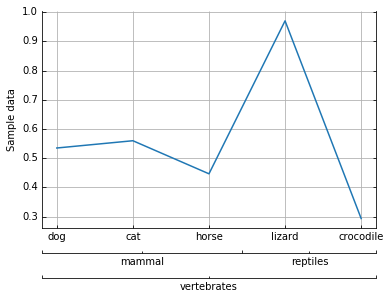

In [15]:
fig1 = plt.figure()
ax1 = SubplotHost(fig1, 111)
fig1.add_subplot(ax1)

# First X-axis
ax1.plot(x, y)
ax1.set_xticks(x)
ax1.set_xticklabels(['dog', 'cat', 'horse', 'lizard', 'crocodile'])
#ax1.xaxis.set_label_text('First X-axis') # Uncomment to label axis
ax1.yaxis.set_label_text("Sample data")

# Second X-axis
ax2 = ax1.twiny()
offset = 0, -25 # Position of the second axis
new_axisline = ax2.get_grid_helper().new_fixed_axis
ax2.axis["bottom"] = new_axisline(loc="bottom", axes=ax2, offset=offset)
ax2.axis["top"].set_visible(False)

ax2.set_xticks([0.0, 0.6, 1.0])
ax2.xaxis.set_major_formatter(ticker.NullFormatter())
ax2.xaxis.set_minor_locator(ticker.FixedLocator([0.3, 0.8]))
ax2.xaxis.set_minor_formatter(ticker.FixedFormatter(['mammal', 'reptiles']))

# Third X-axis
ax3 = ax1.twiny()
offset = 0, -50
new_axisline = ax3.get_grid_helper().new_fixed_axis
ax3.axis["bottom"] = new_axisline(loc="bottom", axes=ax3, offset=offset)
ax3.axis["top"].set_visible(False)

ax3.set_xticks([0.0, 1.0])
ax3.xaxis.set_major_formatter(ticker.NullFormatter())
ax3.xaxis.set_minor_locator(ticker.FixedLocator([0.5]))
ax3.xaxis.set_minor_formatter(ticker.FixedFormatter(['vertebrates']))

ax1.grid(1)

https://matplotlib.org/3.1.1/gallery/ticks_and_spines/multiple_yaxis_with_spines.html

In [1]:
import matplotlib.pyplot as plt

In [2]:
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)

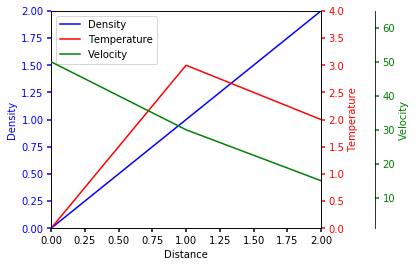

In [4]:
fig, ax = plt.subplots()
fig.subplots_adjust(right=0.75)

ax1 = ax.twinx()
ax2 = ax.twinx()

# Offset the right spine of ax2.  The ticks and label have already been
# placed on the right by twinx above.
ax2.spines["right"].set_position(("axes", 1.2))
# Having been created by twinx, ax2 has its frame off, so the line of its
# detached spine is invisible.  First, activate the frame but make the patch
# and spines invisible.
make_patch_spines_invisible(ax2)
# Second, show the right spine.
ax2.spines["right"].set_visible(True)

p1, = ax.plot([0, 1, 2], [0, 1, 2], "b-", label="Density")
p2, = ax1.plot([0, 1, 2], [0, 3, 2], "r-", label="Temperature")
p3, = ax2.plot([0, 1, 2], [50, 30, 15], "g-", label="Velocity")

ax.set_xlim(0, 2)
ax.set_ylim(0, 2)
ax1.set_ylim(0, 4)
ax2.set_ylim(1, 65)

ax.set_xlabel("Distance")
ax.set_ylabel("Density")
ax1.set_ylabel("Temperature")
ax2.set_ylabel("Velocity")

ax.yaxis.label.set_color(p1.get_color())
ax1.yaxis.label.set_color(p2.get_color())
ax2.yaxis.label.set_color(p3.get_color())

tkw = dict(size=4, width=1.5)
ax.tick_params(axis='y', colors=p1.get_color(), **tkw)
ax1.tick_params(axis='y', colors=p2.get_color(), **tkw)
ax2.tick_params(axis='y', colors=p3.get_color(), **tkw)
ax.tick_params(axis='x', **tkw)

lines = [p1, p2, p3]

ax.legend(lines, [l.get_label() for l in lines])

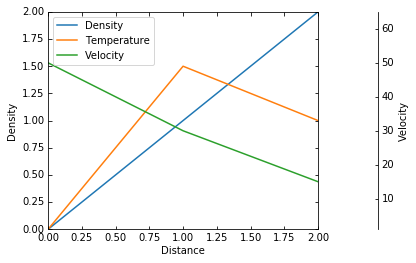

In [9]:
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import matplotlib.pyplot as plt


host = host_subplot(111, axes_class=AA.Axes)
plt.subplots_adjust(right=0.75)

par1 = host.twinx()
par2 = host.twinx()

offset = 60
new_fixed_axis = par2.get_grid_helper().new_fixed_axis
par2.axis["right"] = new_fixed_axis(loc="right",
                                    axes=par2,
                                    offset=(offset, 0))

par2.axis["right"].toggle(all=True)

host.set_xlim(0, 2)
host.set_ylim(0, 2)

host.set_xlabel("Distance")
host.set_ylabel("Density")
par1.set_ylabel("Temperature")
par2.set_ylabel("Velocity")

p1, = host.plot([0, 1, 2], [0, 1, 2], label="Density")
p2, = par1.plot([0, 1, 2], [0, 3, 2], label="Temperature")
p3, = par2.plot([0, 1, 2], [50, 30, 15], label="Velocity")

par1.set_ylim(0, 4)
par2.set_ylim(1, 65)

host.legend()

host.axis["left"].label.set_color(p1.get_color())
par1.axis["right"].label.set_color(p2.get_color())
par2.axis["right"].label.set_color(p3.get_color())